### STA 4724: Homework 4 - Due Thursday, Nov. 9 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name: Daniel Rodriguez**                     

**Your ID:4802087**

## Question 1: Hierarchical Clustering
Use USArrests dataset and perform hierarchical clustering on the states.

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

**(a)** Read the dataset.

In [1]:
import pandas as pd
df = pd.read_csv('USArrests.csv')
display(df)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


**(b)** Using hierarchical clustering with Euclidean distance to cluster the states.

In [2]:
import numpy as np
num_df = df.select_dtypes(include=[np.number])

from scipy.cluster.hierarchy import linkage
linked = linkage(num_df, method='ward')
display(linked)

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 47.        ,  57.        ,  11.6511802 ,   3.        ],
       [ 48.        ,  50.        ,  11.71110584,   3.        ],
       [ 49.        ,  55.        ,  12.08994072,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 33.        ,  44.        ,  13.04492238,   2.        ],
       [ 21.        ,  27.        ,  13.29736816,   2.        ],
       [  2.        ,  30

**(c)** Plot the dendrogram that shows the last 10 merged clusters.

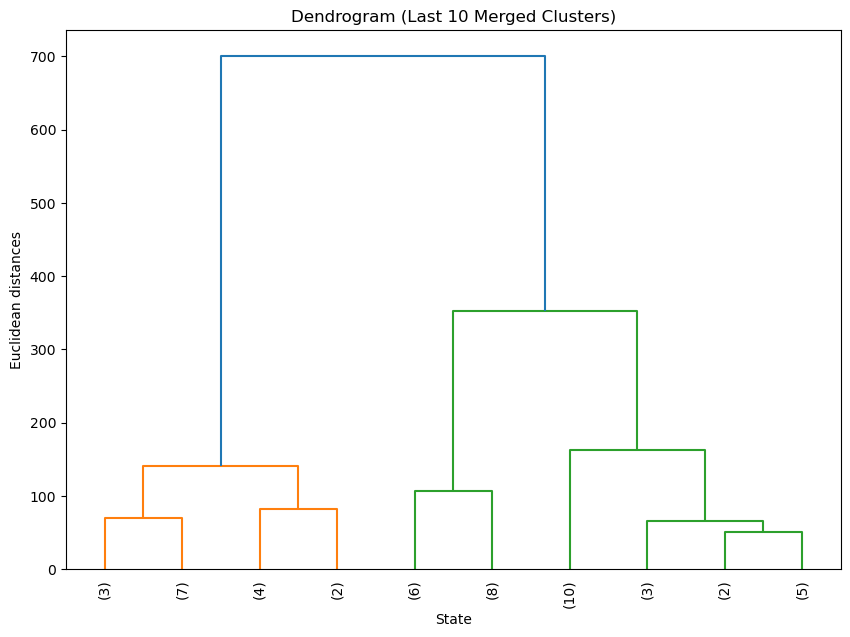

In [3]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=num_df.index, leaf_rotation=90, leaf_font_size=10, truncate_mode='lastp', p=10)
plt.title('Dendrogram (Last 10 Merged Clusters)')
plt.xlabel('State')
plt.ylabel('Euclidean distances')
plt.show()

**(d)** Cut the dendrogram at a height that results in three distinct clusters. Which states belong to each of the three clusters?

Code a program to show your answer.

In [4]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, 150, criterion='distance')

num_df['Cluster'] = clusters

for cluster in set(clusters):
    states_in_cluster = [str(state) for state in num_df.index[num_df['Cluster'] == cluster]]
    print(f"Cluster {cluster}: {', '.join(states_in_cluster)}")

Cluster 1: 0, 1, 2, 4, 7, 8, 12, 17, 19, 21, 23, 27, 30, 31, 32, 39
Cluster 2: 3, 5, 9, 20, 24, 29, 35, 36, 38, 41, 42, 45, 46, 49
Cluster 3: 6, 11, 13, 15, 16, 25, 26, 34, 37, 43
Cluster 4: 10, 14, 18, 22, 28, 33, 40, 44, 47, 48


## Question 2: Decision Trees

Boston is a data set containing housing values in 506 suburbs of Boston. We would like to predict the house price using this dataset.

Here is the data descriptions: 

* crim: 
per capita crime rate by town.

* zn: 
proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: 
proportion of non-retail business acres per town.

* chas: 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: 
nitrogen oxides concentration (parts per 10 million).

* rm: 
average number of rooms per dwelling.

* age: 
proportion of owner-occupied units built prior to 1940.

* dis: 
weighted mean of distances to five Boston employment centres.

* rad: 
index of accessibility to radial highways.

* tax: 
full-value property-tax rate per $10,000.

* ptratio: 
pupil-teacher ratio by town.

* lstat: 
lower status of the population (percent).

* medv: 
median value of owner-occupied homes in $1000s.

Hint: When you build a decision tree to predict house prices, each left node ends up with several houses in it. The average price of these houses is the predicted price for this left node.  You can view this as a supervised clustering, and the prediction is the mean of each cluster. This is also known as Decision Tree Regressor.

For this question, you can either build the regular decision tree and then take the mean for each node by yourself. Or you can use the DecisionTreeRegressor function that we didn't cover in class.

**(a)** Load the dataset.

In [5]:
import pandas as pd

df = pd.read_csv('Boston.csv')

X = df.drop('medv', axis=1)
y = df['medv']

display(X)
display(y)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

**(b)** Use cross-validation to find the best parameters (max_depth, min_samples_leaf) for the decision tree.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 9, 11, 13, 15],'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

reg = DecisionTreeRegressor()

gs = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X, y)

best_params = gs.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4}


**(c)** Train the decision tree with the best parameters, then generate a Graphviz visualization of the tree.

Hint 1: You will generate a graphviz .dot file first. Install Graphviz or use online tool to make the actual plot, then you can save or screenshot the tree plot.

Hint 2: To insert a image in the Jupyter notebook, click *Edit -> Insert Image*.

In [7]:
best_tree = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
best_tree.fit(X, y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

Post the tree plot here: 

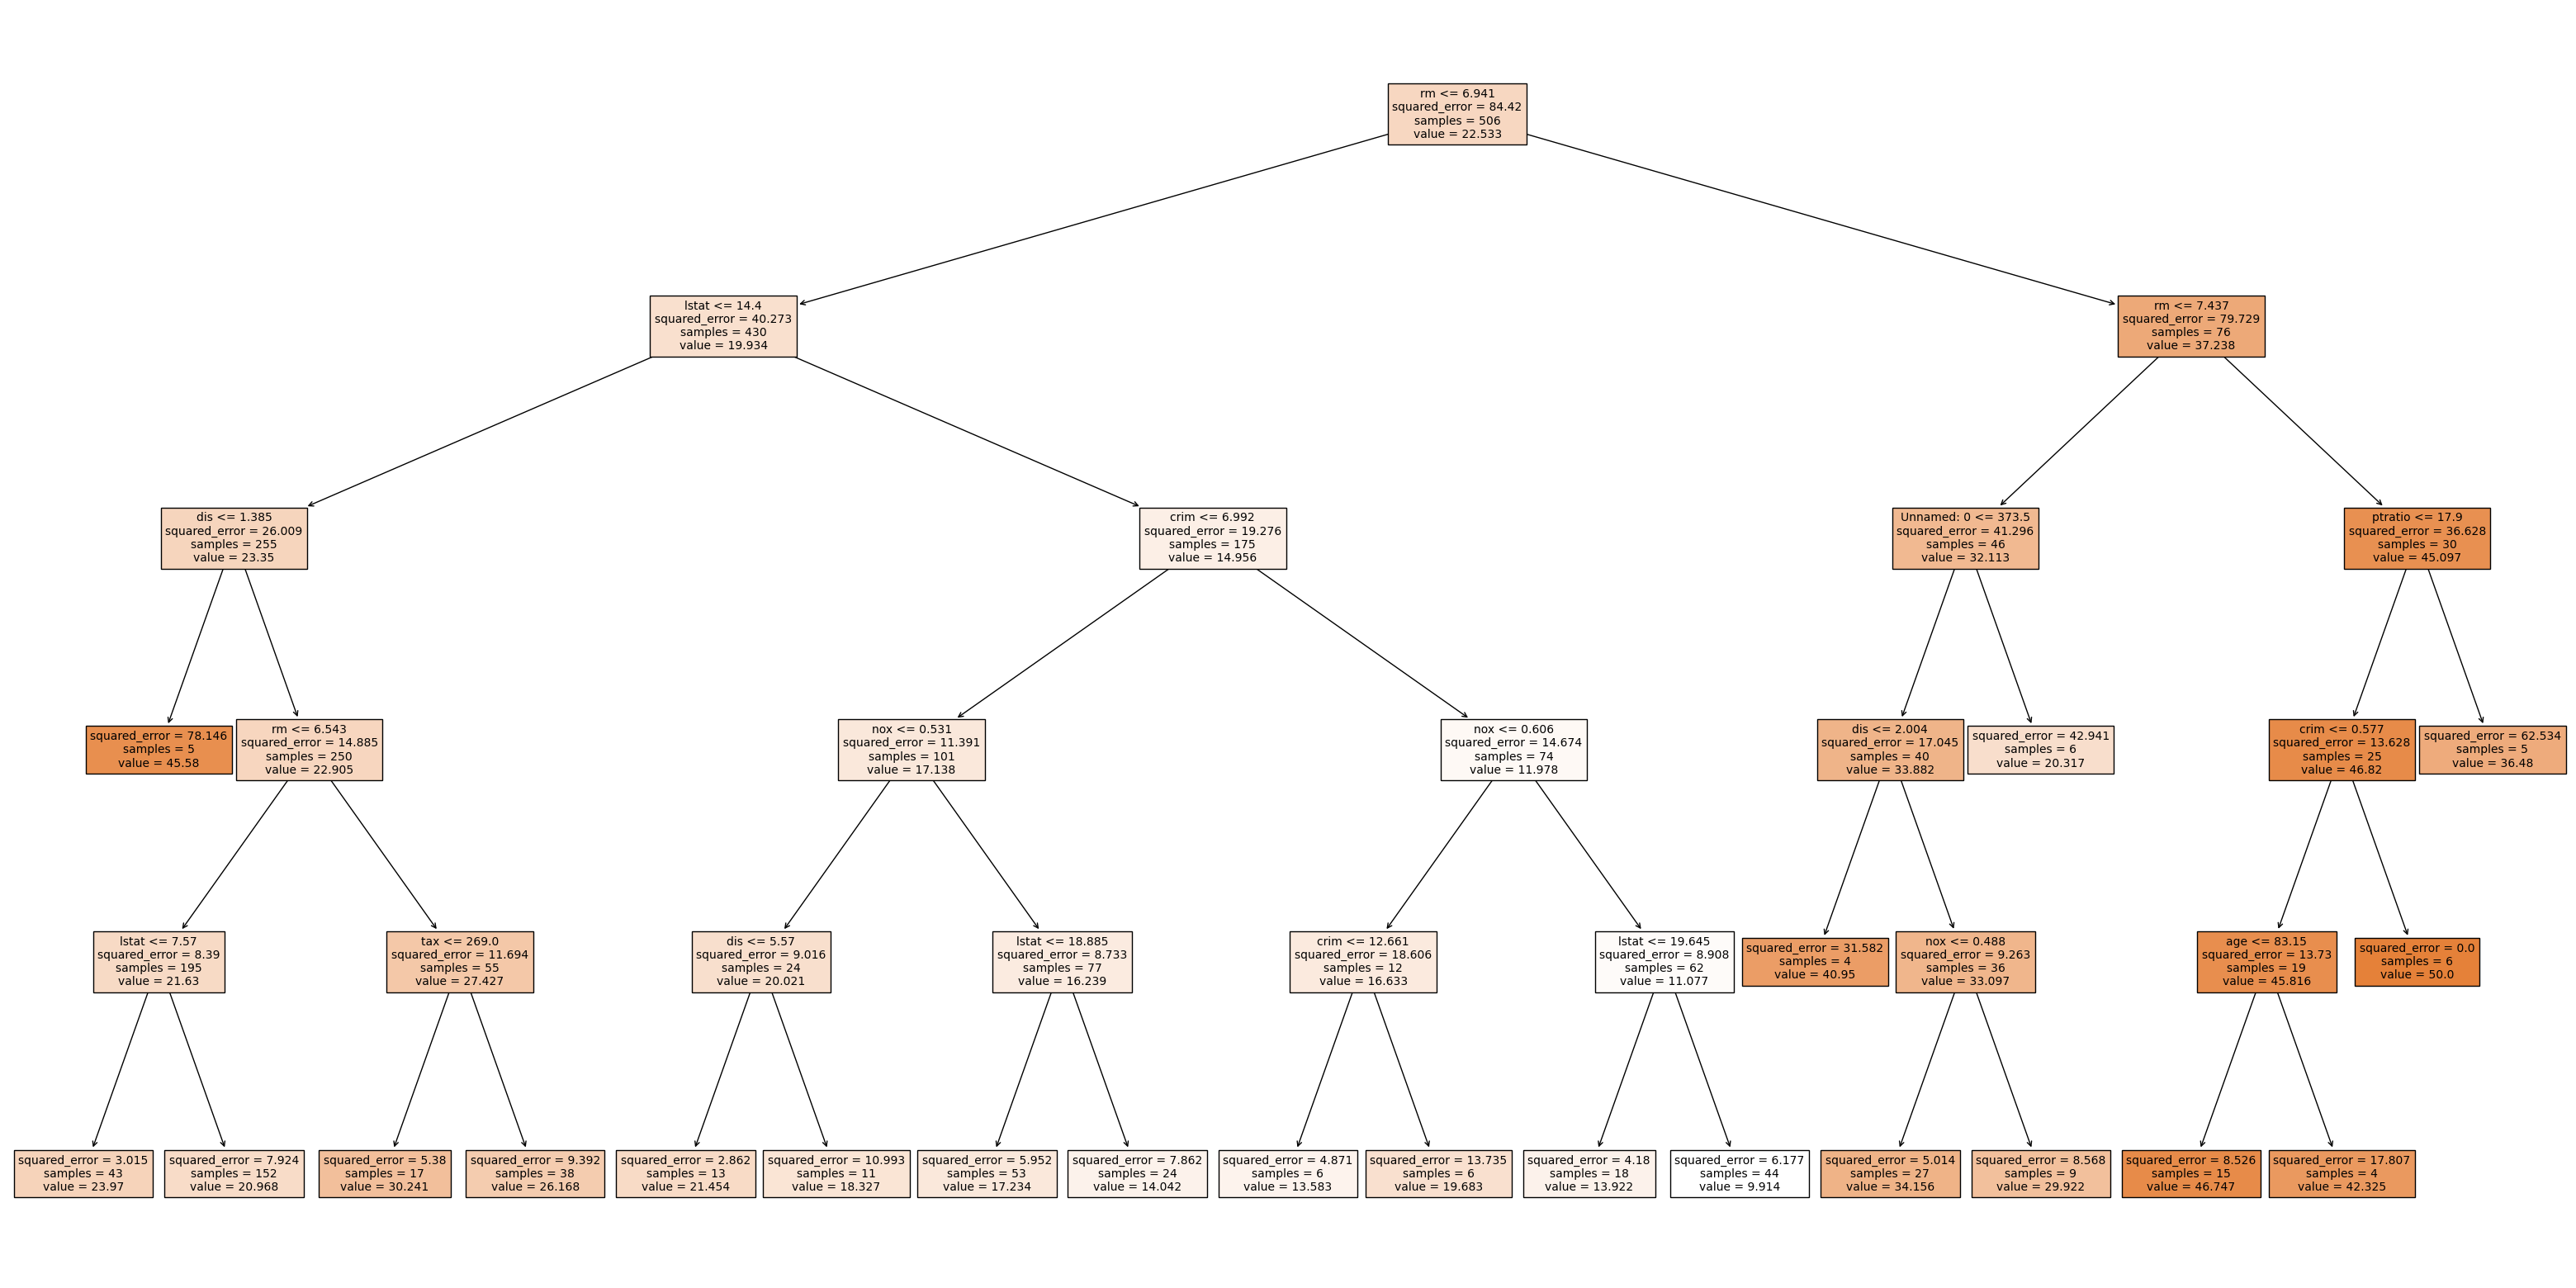

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names_list = X.columns.tolist()

plt.figure(figsize=(40,20))
plot_tree(best_tree, filled=True, feature_names=feature_names_list, fontsize=10)
plt.show()